In [1]:
# Modules for presentation
from IPython.display import Image, IFrame

import warnings; warnings.simplefilter('ignore')

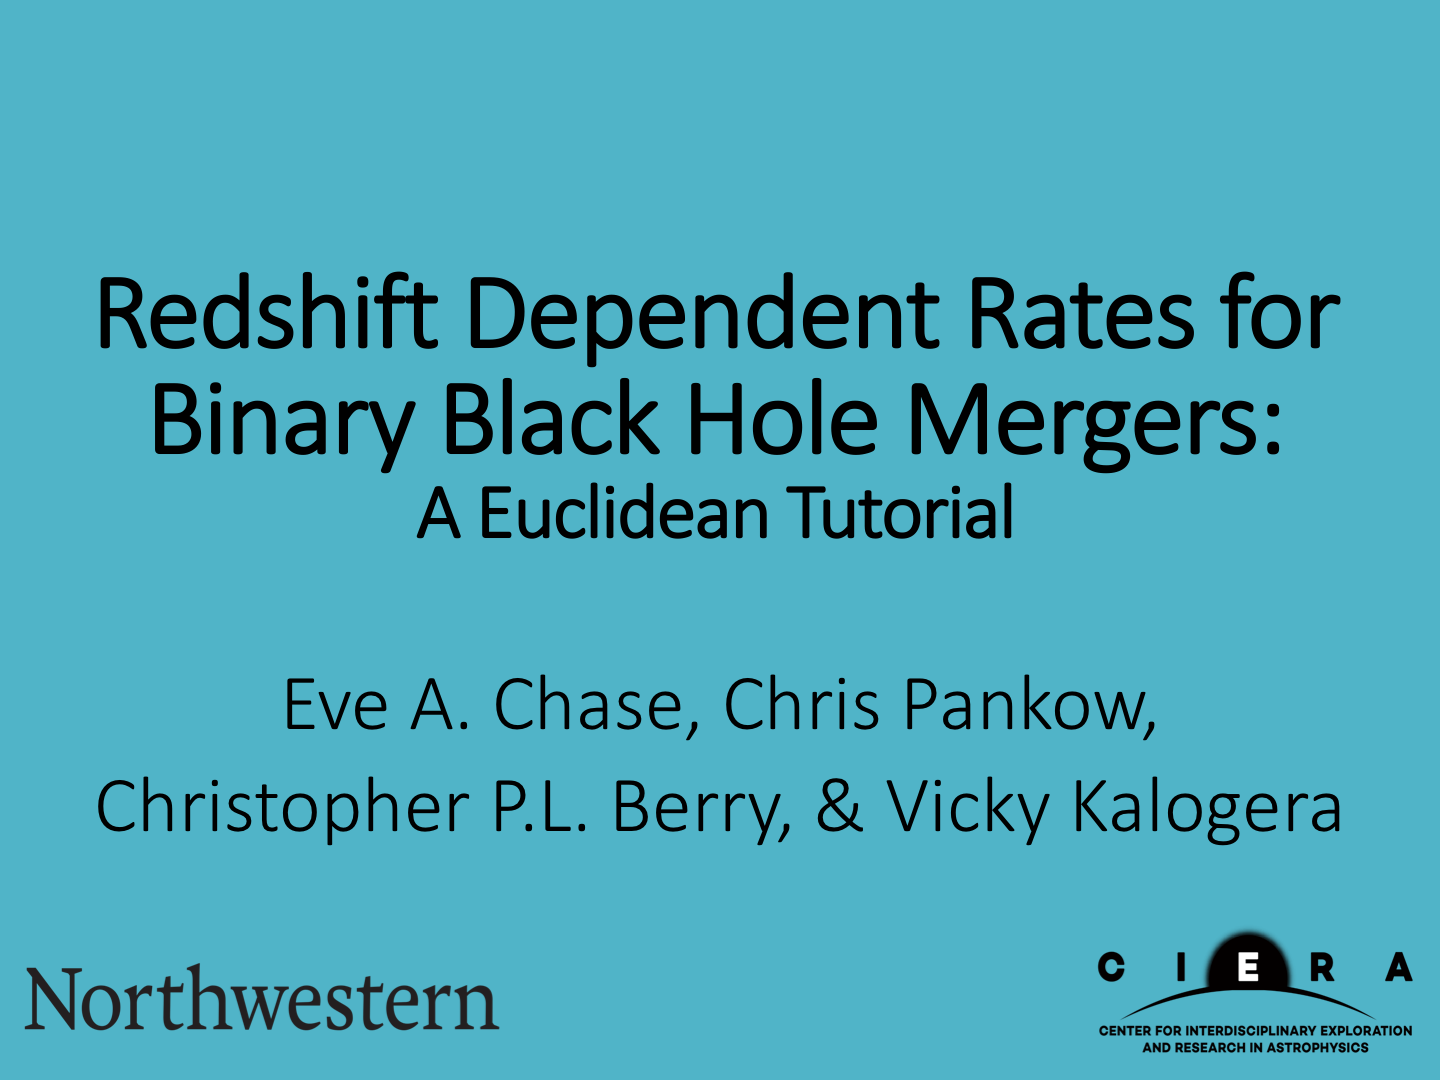

In [2]:
Image('slides/TitleSlide.png')

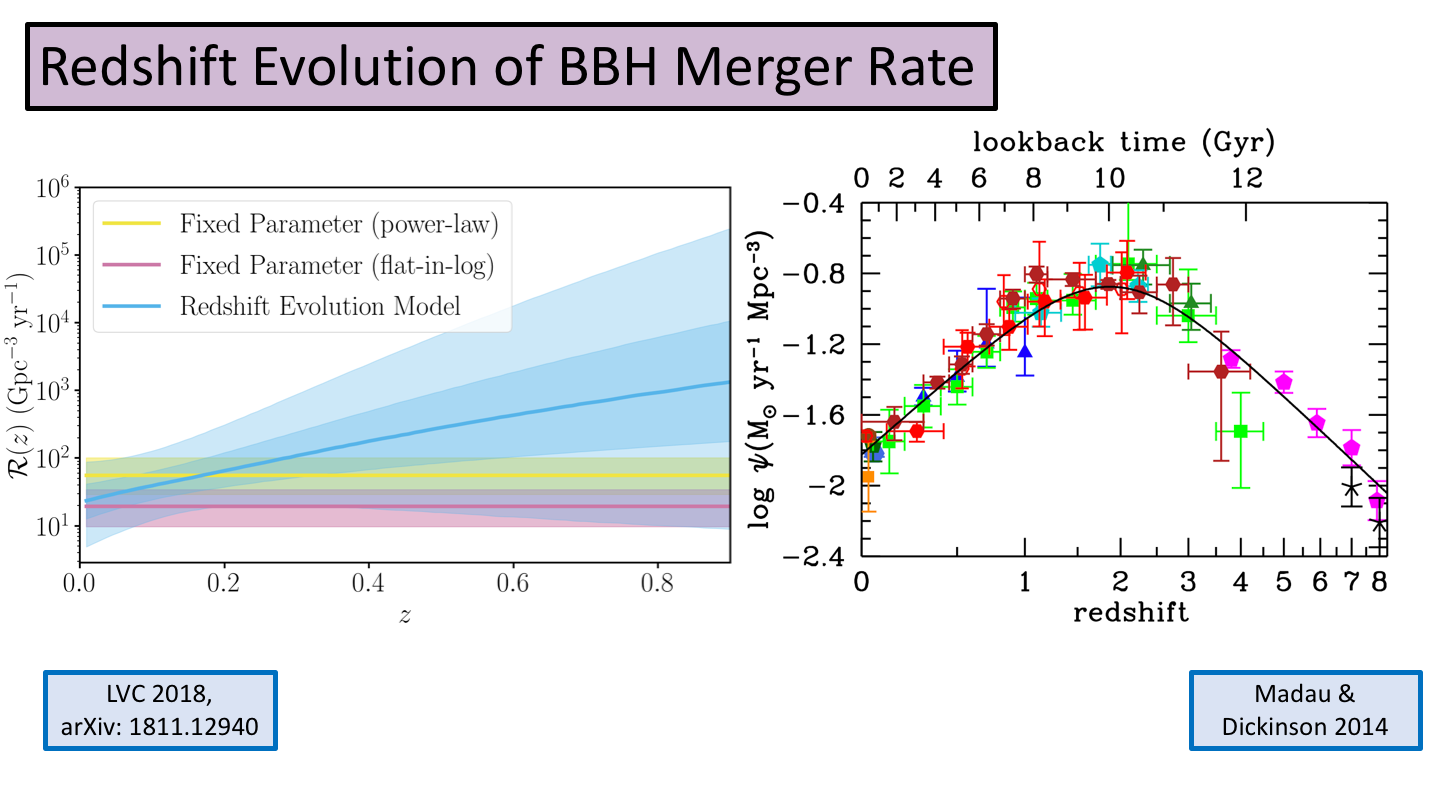

In [3]:
Image('slides/OverviewRedshiftRates.png')

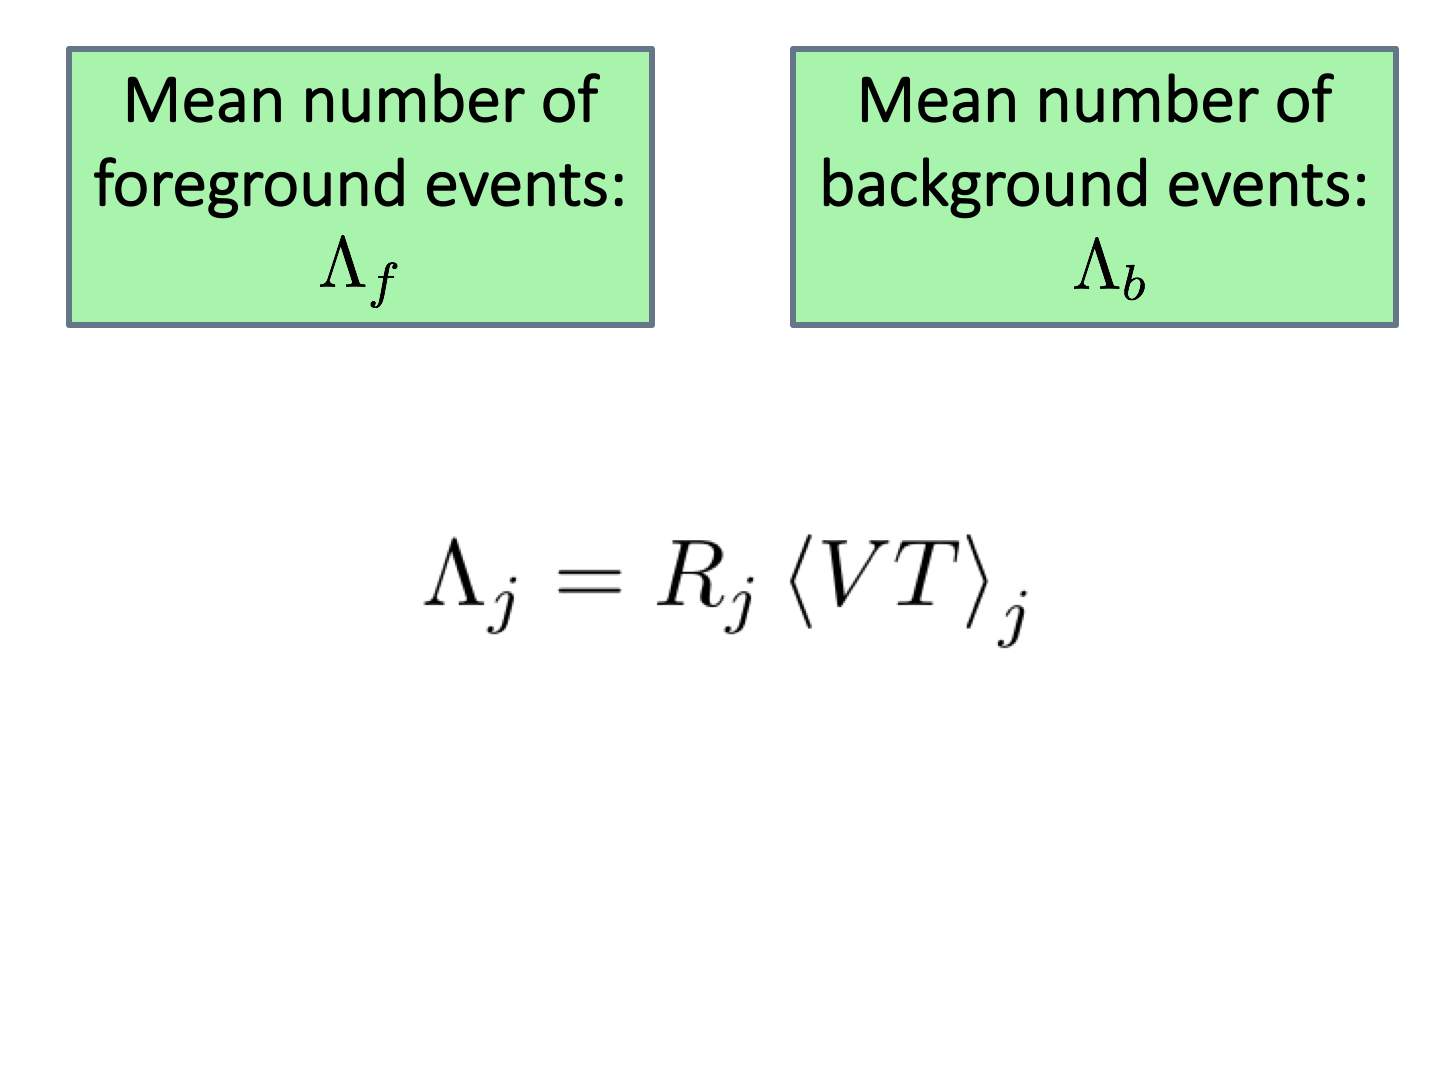

In [4]:
Image('slides/RateVT.png')

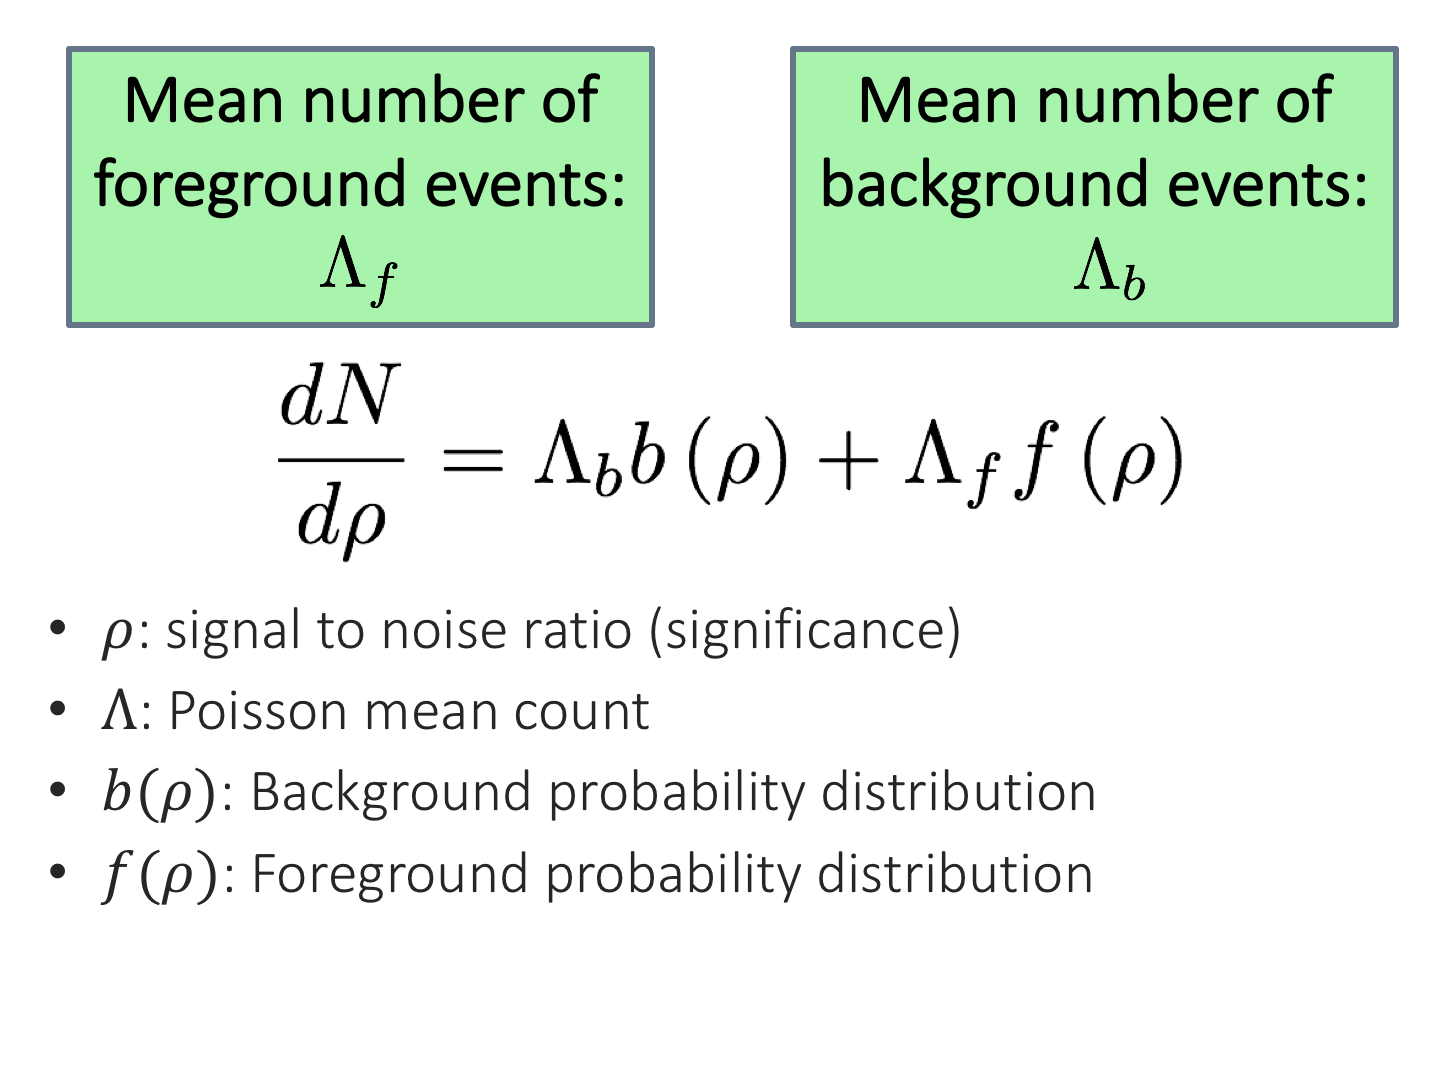

In [5]:
Image('slides/PoissonProcess.png')

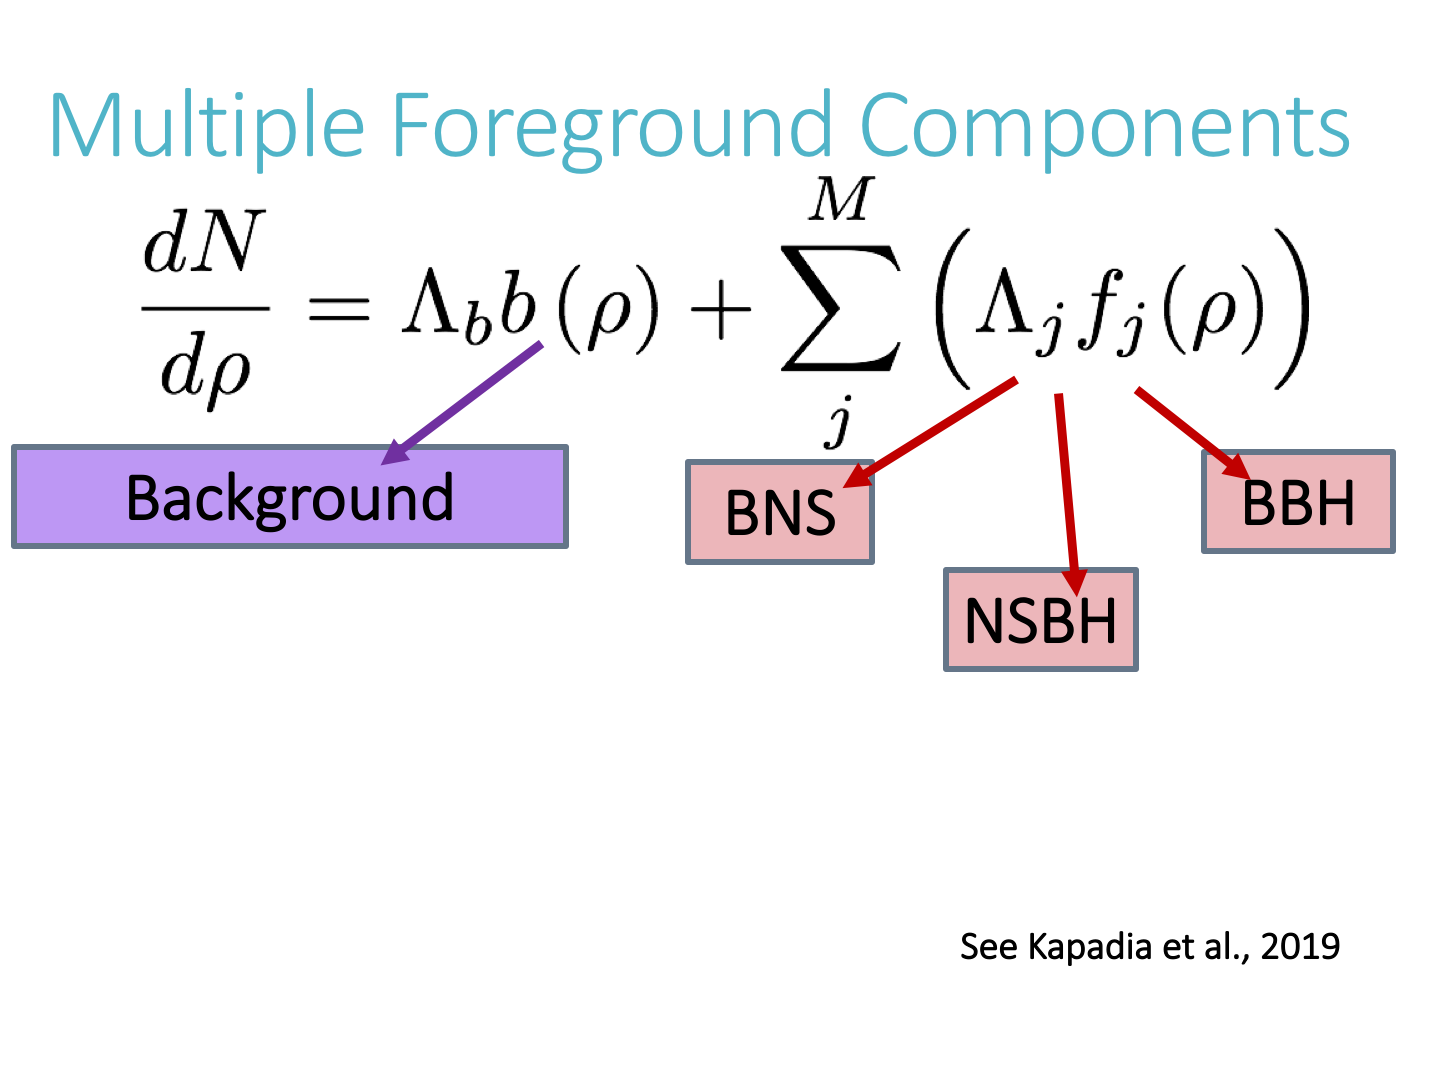

In [6]:
Image('slides/MultiComponentFGMC.png')

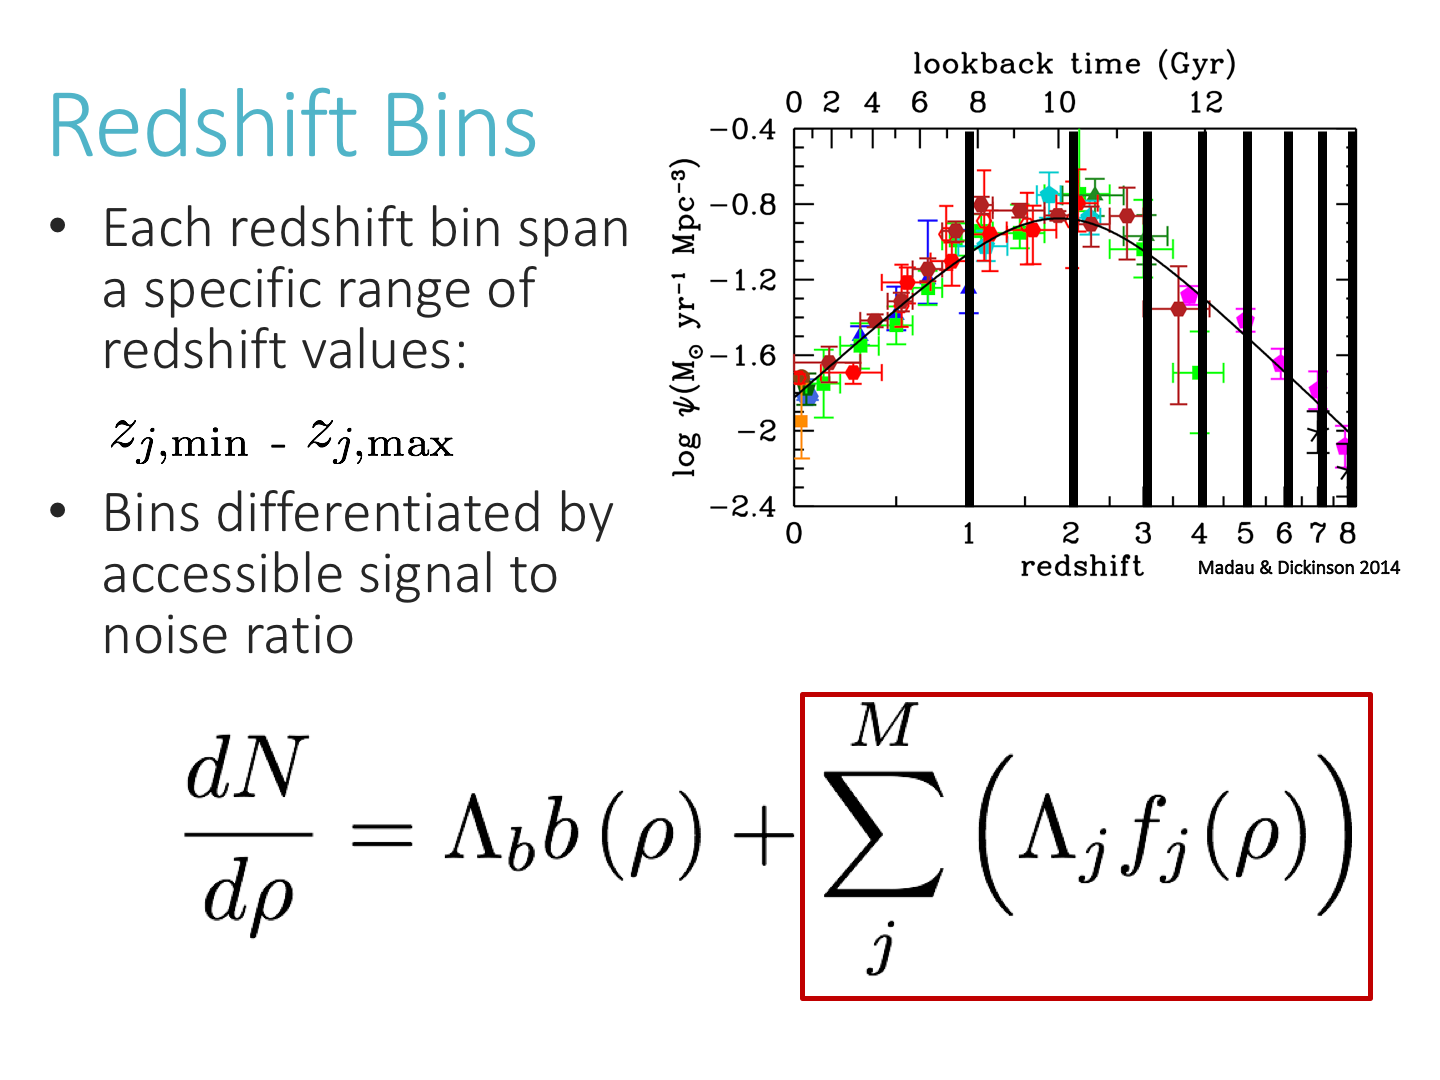

In [7]:
Image('slides/RedshiftBins.png')

# LVC Tutorial Goals

* Generate a set of mock foreground and background events with gw_event_gen
* 1-Component FGMC for events distributed uniformly in Euclidean volume
* Estimate rates that vary with Euclidean distance with **multi-component FGMC**

In [8]:
!git submodule init -- gw_event_gen
!git submodule update -- gw_event_gen

In [9]:
# Standard imports
from __future__ import division

import emcee
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

# Astropy imports
from astropy import units
from astropy.cosmology import Planck15, z_at_value

# Modules specific to this code
sys.path.append("./gw_event_gen")
from netsim import Network
import redshift_rates_tool as rt

In [10]:
# Set basic parameters

# Bin edges
num_bins = 1
dist_low = 0  # Mpc
dist_high = 500  # Mpc
bin_edges = np.linspace(dist_low, dist_high, num_bins+1)  # Mpc

# Injected rate
injected_rate = 5  # Gpc^-3 yr^-1


In [11]:
# Generate events uniformly in Euclidean volume
events = rt.generate_uniform_euclidean(
    # Minimum distance in Mpc
    dist_low=dist_low, 
    
    # Maximum distance in Mpc
    dist_high=dist_high,
    
    # Number of events generated
    num_events=300, 
    )


In [13]:
# Show analytic distribution of events
!python make_analytic_plot \
    --num-bins 1 \
    --bin-edges '[$dist_low,$dist_high]' \
    -o 'analytic_1bin.png'

[0,500]
Computing Bin 0
Normalization factor: 0.987192877233985


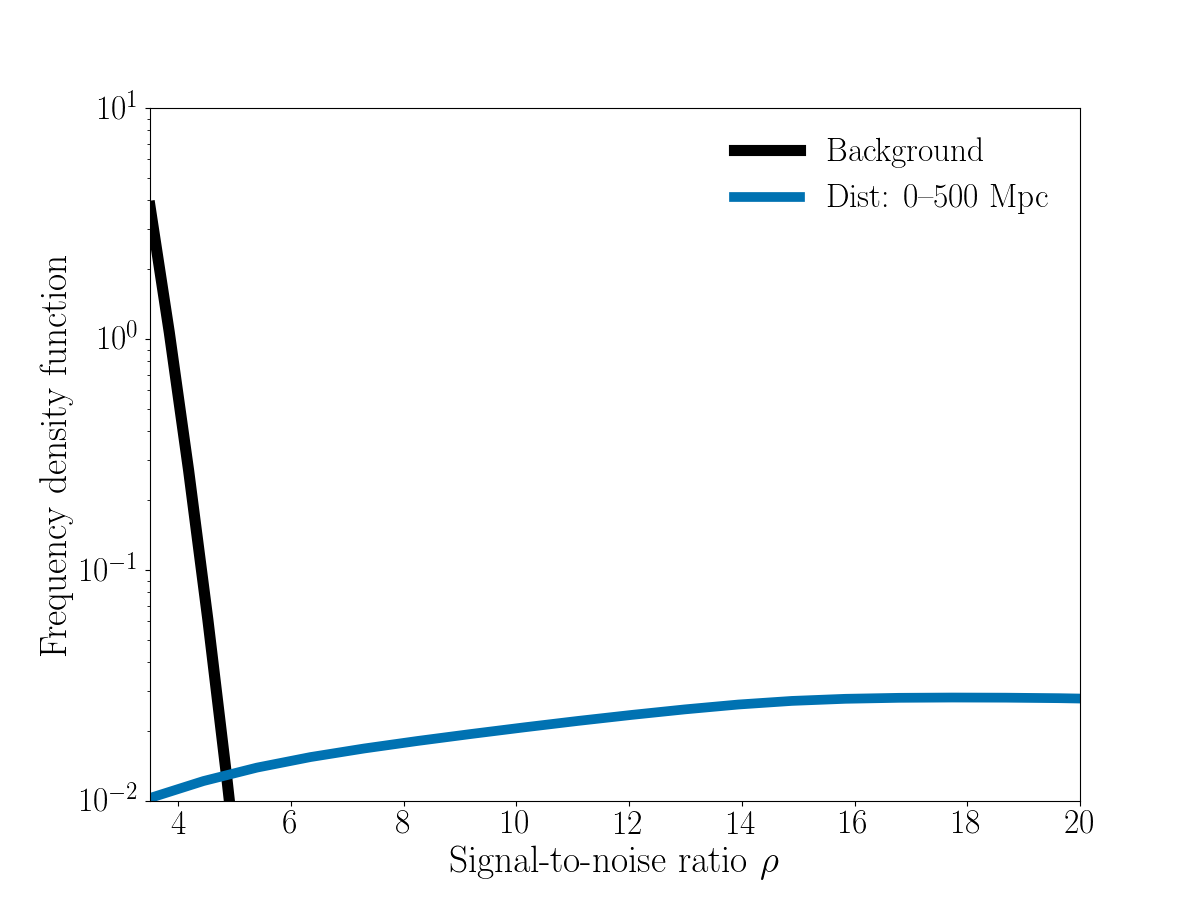

In [14]:
Image('analytic_1bin.png')

In [17]:
# Generate posterior samples on Lambda and rate
!python reproducable_rates_procedure \
    --num-bins $num_bins \
    --bin-edges '[$dist_low,$dist_high]' \
    --bg-lambda 10 \
    --generate-fg \
    --injected-rate $injected_rate \
    -rs 170608 \
    -o 'posteriors_uniform_euclidean_1bin.csv'


[   0.         4745.46045692]
Total VT: 38.27 Gpc^3 yr
Generating background samples (this can take a while)
Starting to generate events (this can take a while)
Done generating events
Foreground samples provided
True Values: [12, 200]
Background likelihood sum:  156.71160588325102
Normalization factor: 0.08818707802505138
Bin likelihood sum:  81.09574350706308
MCMC Complete
VT_arr: [38.27053945]
Total FG: 200
Total VT: 38.270539445611696
Total R: 5.225951943641418
The true background Lambda, 10.00, is recovered at the 24.326 per cent level.
The true foreground Lambda, 191.35, is recovered at the 0.000 per cent level.


In [18]:
# Output: posterior samples of Lambda
pd.read_csv('posteriors_uniform_euclidean_1bin.csv')

,Background,Bin 1,Rate 1
0,24.425076,194.824092,5.090707
1,24.425076,194.824092,5.090707
2,24.425076,194.824092,5.090707
3,24.425076,194.824092,5.090707
4,24.425076,194.824092,5.090707
5,24.425076,194.824092,5.090707
6,15.131852,196.299782,5.129266
7,15.131852,196.299782,5.129266
8,24.077537,186.628041,4.876546
9,24.077537,186.628041,4.876546


In [21]:
# Make a corner plot of samples
!python make_corner \
    -i 'posteriors_uniform_euclidean_1bin.csv' \
    -o 'corner_1bin.png' \
    --num-bins 1 \
    --counts '[10,5]'
 

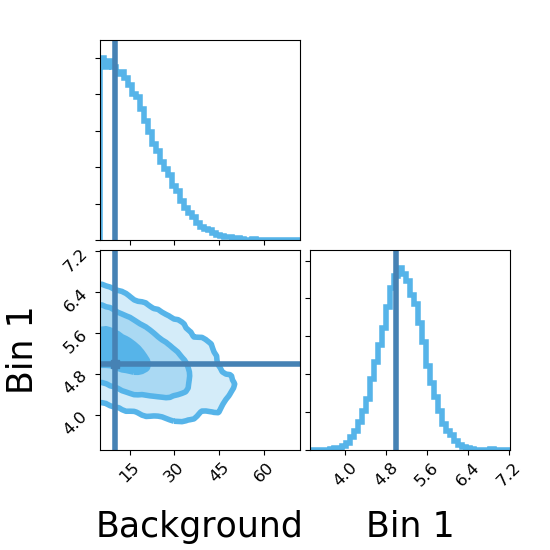

In [22]:
Image('corner_1bin.png')

In [24]:
# Multiple bins

num_bins = 5
dist_low = 0  # Mpc
dist_high = 2000  # Mpc
bin_edges = np.linspace(dist_low, dist_high, num_bins+1)  # Mpc
print bin_edges


# Injected rate
injected_rate = 5  # Gpc^-3 yr^-1

[   0.  400.  800. 1200. 1600. 2000.]


In [ ]:
# Convert distances to redshifts
d0, d1, d2, d3, d4, d5 = [dist for dist in bin_edges]    

# Make some plot of the events. Show analytic plot? Will need to edit that code a bit
!python make_analytic_plot \
    --num-bins 5 \
    --bin-edges '[$d0,$d1,$d2,$d3,$d4,$d5]' \
    -o 'analytic_5bin.png'

[0.0,400.0,800.0,1200.0,1600.0,2000.0]
Computing Bin 0
Normalization factor: 0.9937820196835426
Computing Bin 1
Normalization factor: 0.9570379974977782
Computing Bin 2


In [ ]:
Image('analytic_5bin.png')

In [21]:
# Generate posterior samples on Lambda and rate
!python reproducable_rates_procedure \
    --num-bins $num_bins \
    --bin-edges '[0,400,800,1200,1600,2000]' \
    --bg-lambda 10 \
    --generate-fg \
    --injected-rate $injected_rate \
    -rs 170608 \
    -o 'posteriors_uniform_euclidean_5bin.csv'



/Users/eachase/miniconda3/envs/ligo_27/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
[   0.          949.09209138 1898.18418277 2847.27627415 3796.36836554
 4745.46045692]
Total VT: 38.27 Gpc^3 yr
Generating background samples (this can take a while)
Starting to generate events (this can take a while)
Done generating events
Foreground samples provided
True Values: [12, 17, 67, 82, 29, 5]
Background likelihood sum:  156.71160588325102
Normalization factor: 0.8600570374633848
Bin likelihood sum:  19.343252511270173
Normalization factor: 0.5214331948601423
Bin likelihood sum:  55.10802067483297
Normalization factor: 0.205324370541421
Bin likelihood sum:  88.46199268717797
Normalization factor: 0.05910428713123246
Bin likelihood sum:  120.77114670133324
Normalization factor: 0.007279301997138811
Bin likelihood sum:  154.20952985385202
MCMC Complete
VT_arr: [

In [22]:
# Maybe also throw in a corner plot
!python figures/make_corner \
    -i 'posteriors_uniform_euclidean_5bin.csv' \
    -o 'corner_5bin.png' \
    --num-bins 5 \
    --counts '[10,5,5,5,5,5]'

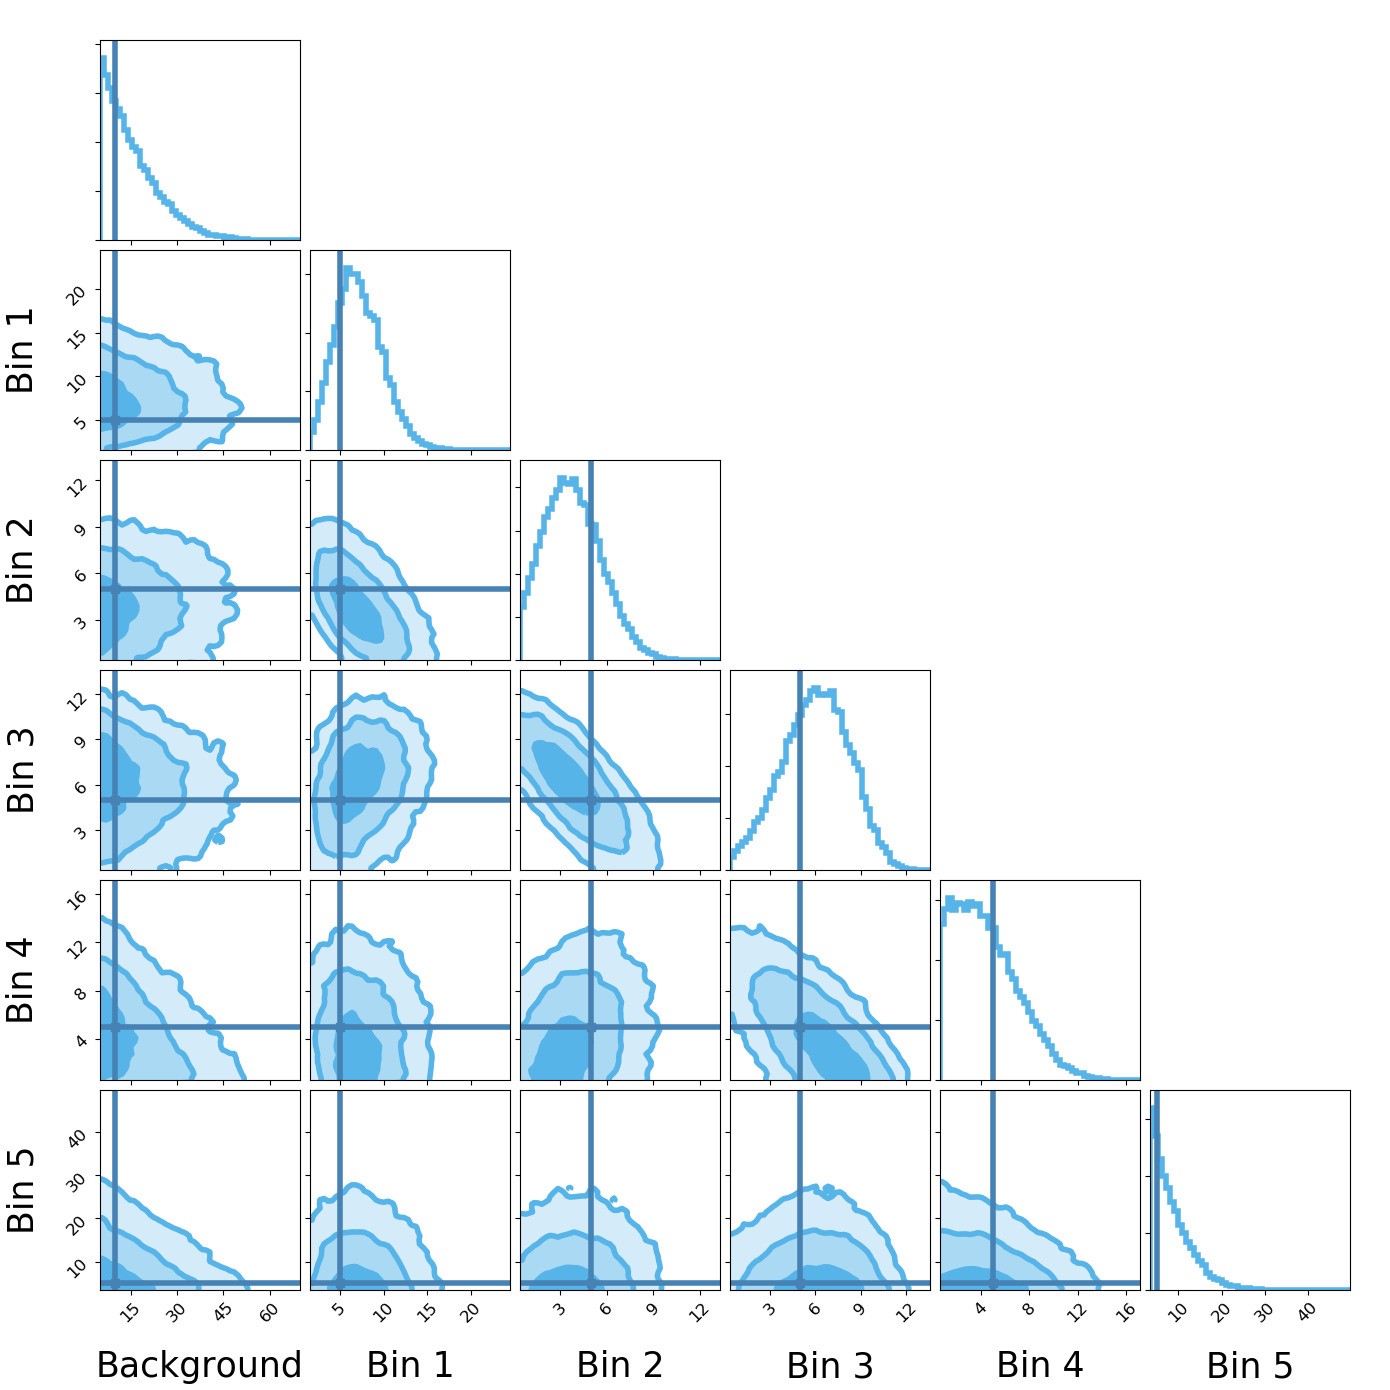

In [3]:
Image('corner_5bin.png')

In [24]:
# Rate plot
!python figures/make_rate_plot \
    -i 'posteriors_uniform_euclidean_5bin.csv' \
    -o 'rateplot_5bin.png' \
    --num-bins 5 \
    --universe euclidean \
    --bin-edges '[0,100,200,300,400,500]' \
    --injected 5 \
    --ymin 0 \
    --ymax 25

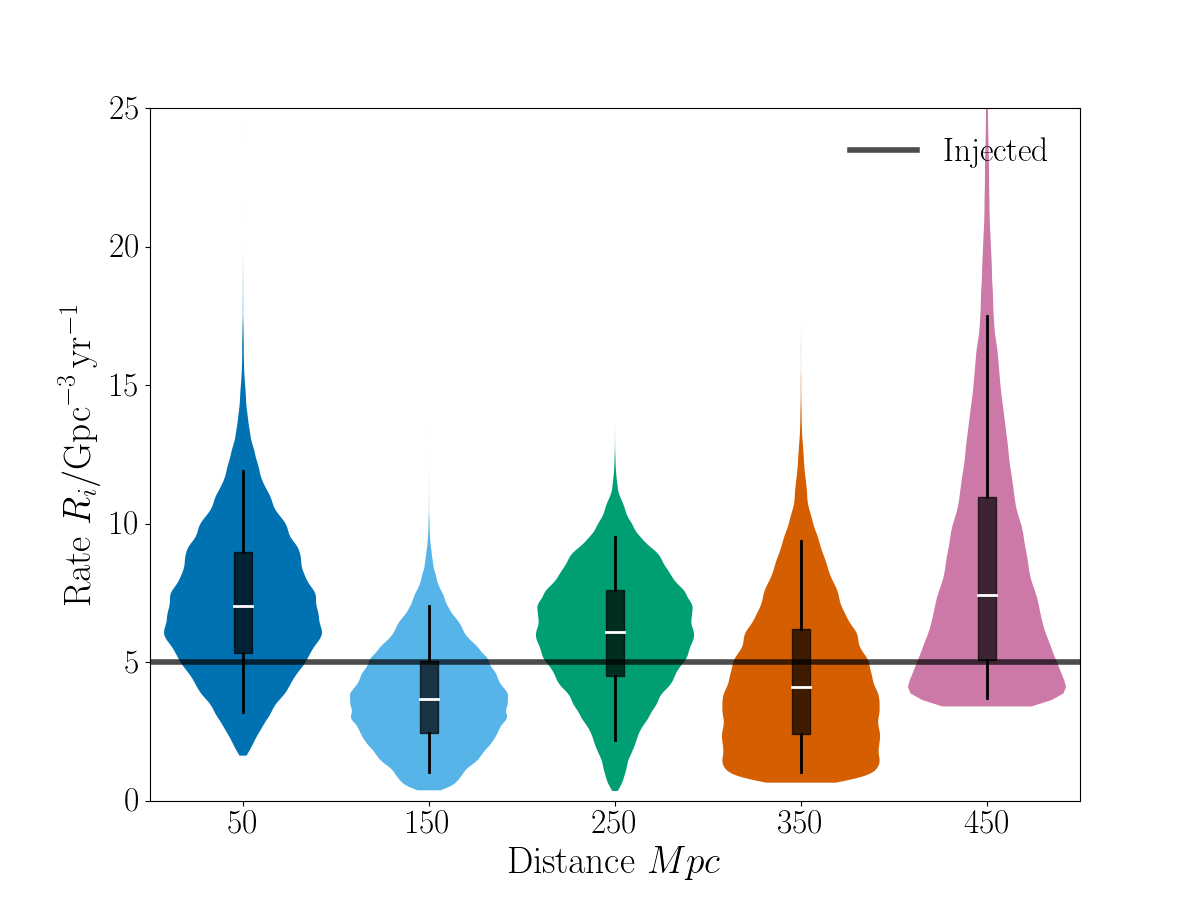

In [4]:
Image('rateplot_5bin.png')

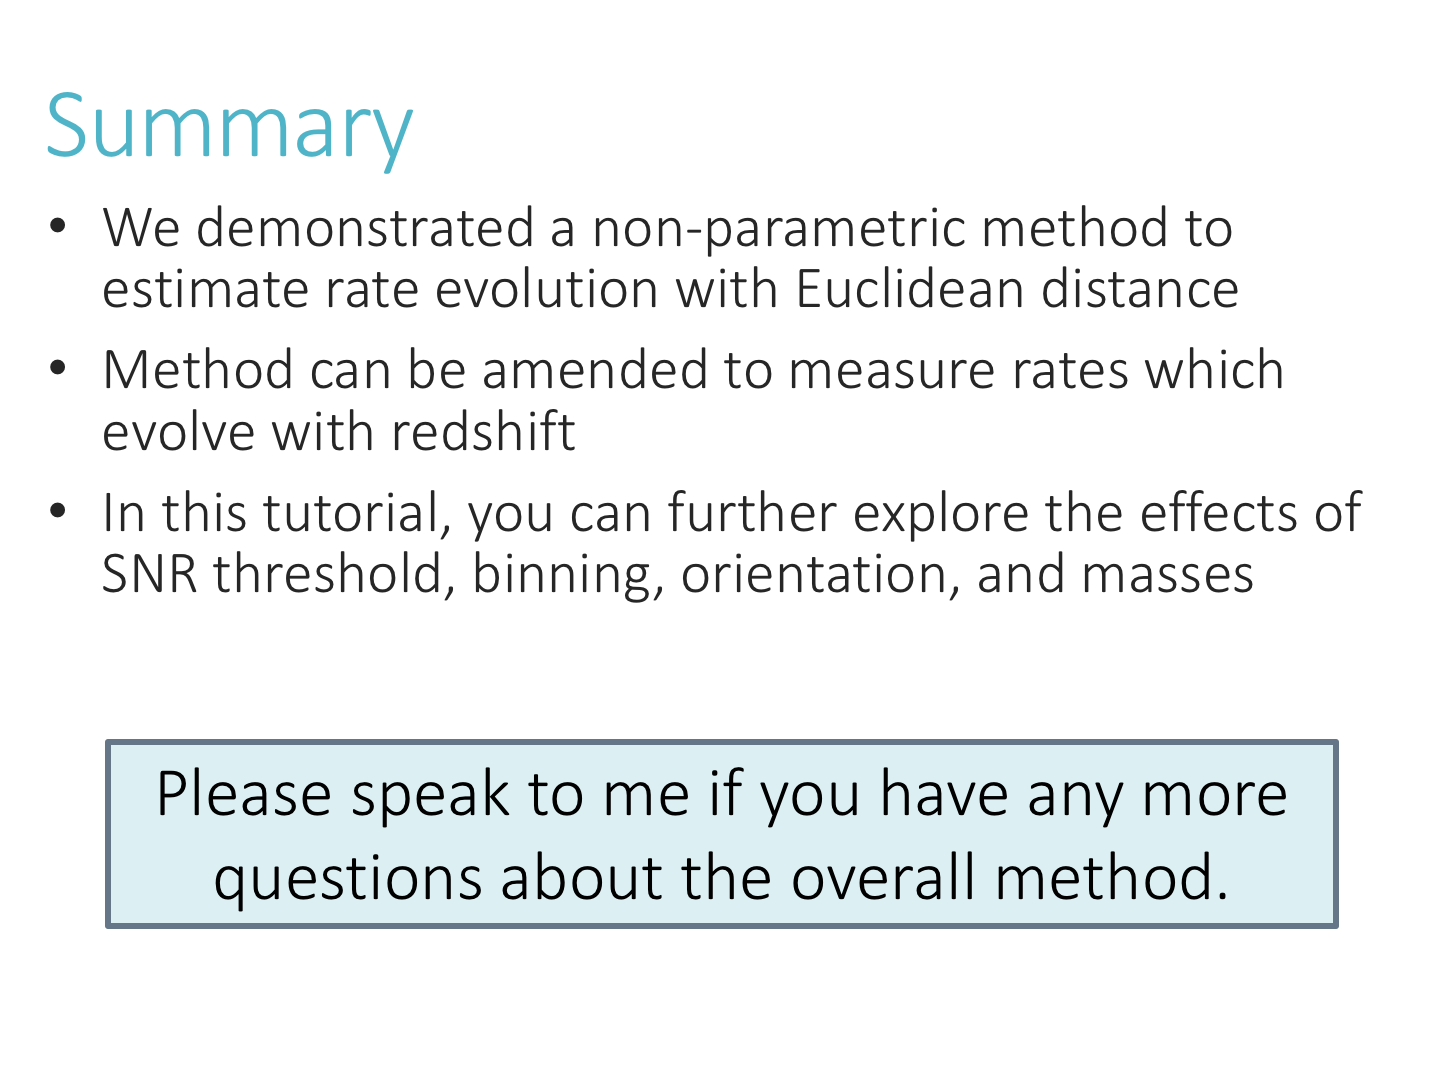

In [5]:
Image('presentations/SummarySlide.png')

# Additional examples
 * Adding the `--optimal` flag will only consider optimally-oriented binaries
 * Change the `num_bins`
 * Alter the `injected-rate` (large rates will take considerably longer to run)
 * Alter the `threshold-snr`, the threshold SNR of the search
 * Manually alter the `--bin-edges`. This should be an array of length (1 + num_bins)
 

In [6]:
# Additional example

num_bins = 5
injected_rate = 1  # Gpc^-3 yr^-1
snr_thresh = 3.5

# FIXME add mass option
#mass1, mass2 = 



!python reproducable_rates_procedure \
    --num-bins $num_bins \
    --optimal \
    --bin-edges '[0,400,800,1200,1600,2000]' \
    --bg-lambda 10 \
    --generate-fg \
    --threshold-snr $snr_thresh \
    --injected-rate $injected_rate \
    -rs 170608 \
    -o 'posteriors_NAME.csv'



/Users/eachase/miniconda3/envs/ligo_27/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
[   0.          949.09209138 1898.18418277 2847.27627415 3796.36836554
 4745.46045692]
Traceback (most recent call last):
  File "reproducable_rates_procedure", line 222, in <module>
    equal_mass=equal_mass, mass1=mass1, mass2=mass2, rs=rs)
  File "/Users/eachase/Documents/research/rates/redshift/redshift_rates_tool.py", line 719, in __init__
    snr_threshold=snr_thresh)["H1"]
  File "/Users/eachase/Documents/research/rates/redshift/gw_event_gen/netsim.py", line 268, in horizon
    horizon_dict[inst] = snr / snr_threshold
TypeError: unsupported operand type(s) for /: 'float' and 'str'
